# <center>Evaluation and comparison of machine learning algorithms in the context of Intrusion Detection Systems for IoT<center>

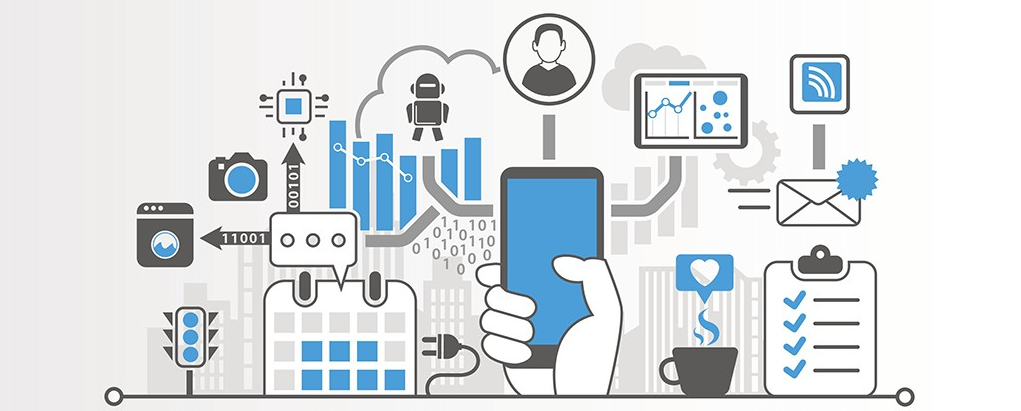

## Context and research question

The research investigates the applicability and effectiveness of various ML algorithms  in crafting anomaly-based IDS **(Intrusion Detection Systems)** tailored for IoT environments.

**It presents a comprehensive comparative analysis of the performance of
diverse supervised machine learning algorithms. Leveraging a complex IoT-specific dataset
encompassing various IoT devices and a spectrum of attack scenarios, this research seeks to
identify the most effective ML algorithms for anomaly-based IDS in IoT.**

## Data

**ToN-IoT** dataset is a valuable resource for researchers and cybersecurity professionals looking to study and address the security challenges posed by IoT and IIoT networks. Its heterogeneity, labeling, and inclusion of various attack types make it a rich source of data for developing and testing security algorithms and systems.

In this dataset, there are nine types of cyber attacks that were launched against various IoT and IIoT sensors within the network, as follows:

* Scanning
* Cross-Site Scripting (XSS)
* Denial of Service (DoS)
* Distributed Denial of Service (DDoS)
* Backdoor
* Injection Attack
* Password Attack
* Man-In-The-Middle (MITM)
* Ransomware

To generate the dataset, various IoT/IIoT scenarios were simulated in the testbed platform. These scenarios can be applied to the following popular IoT/IIoT applications: smart homes, smart cities, and smart manufacturing. For example, smart refrigerator sensors, garage door sensors, and motion-activated lights can be found in most smart homes. GPS sensors can be encountered in smart cities. Modbus, thermostats, and weather monitoring can be found in most industrial smart manufacturing applications. The details of the IoT/IIoT scenarios and the extracted features are presented below:

* **date** - Date of recording;
* **time** - Time of recording;
* **label** - Identify the recording as normal or an attack, where '0' indicates normal and '1' indicates an attack;
* **type**  - A label with subclasses of normal or attack, such as DoS, DDoS, and backdoor attacks;
* **fridge_temperature** - Measuring the temperature of a refrigerator sensor;
* **temp_condition** - Temperature conditions of a refrigerator sensor, where the temperature is either high or low depending on a predefined threshold value;
* **door_state** - The state of a garage door sensor when it is either closed or open;
* **sphone_signal** - The reception state of the signal from the door or phone, where the signal is either true or false.
* **latitude** - The value of the GPS tracking sensor's latitude;
* **longitude** -  The value of the GPS tracking sensor's longitude;
* **motion_status** - The state of the motion sensor, which can be either 'on' (1) or 'off' (0), where '1' indicates 'on' and '0' indicates 'off';
* **light_status** - The state of a light sensor can be either 'activated' (on) or 'deactivated' (off);
* **FC1 Read Input Register** - The Modbus function code responsible for reading an input register, which contains input information from various sensors or external sources;
* **FC2 Read Discrete Value** - The Modbus function code responsible for reading a discrete value, which represents binary signals or states that can be either true or false, as in the case of switches, is typically Function Code 2 (Read Discrete Inputs) or Function Code 1 (Read Coils) in the Modbus protocol. These codes are used to read digital inputs or binary states;
* **FC3 Read Holding Register** -  The Modbus function code responsible for reading a holding register, which stores data such as analog values or configuration information, is typically Function Code 3 (Read Analog Output Holding Registers) in the Modbus protocol. This code is used to read data from holding registers that store analog values and other configuration data;
* **FC4 Read Coil** - The Modbus function code responsible for reading coil registers, which enable the control of device or process states;
* **current temperature** - The current temperature value measured by a thermostat sensor;
* **thermostat status** - The state of a thermostat sensor can be either 'activated' (on) or 'deactivated' (off);
* **temperature** - The temperature measurements from the weather sensor;
* **pressure** - Readings of atmospheric pressure from the weather sensor;
* **humidity** - Readings of humidity from the weather sensor.

## Classification algorithms used:

* Logistic Regression
* Decision Trees
* Random Forest
* k-Nearest Neighbors (k-NN)
* Naive Bayes
* Gradient Boosting (e.g., XGBoost, LightGBM, AdaBoost)
* Linear Discriminant Analysis (LDA)
* Quadratic Discriminant Analysis (QDA)

## Research steps

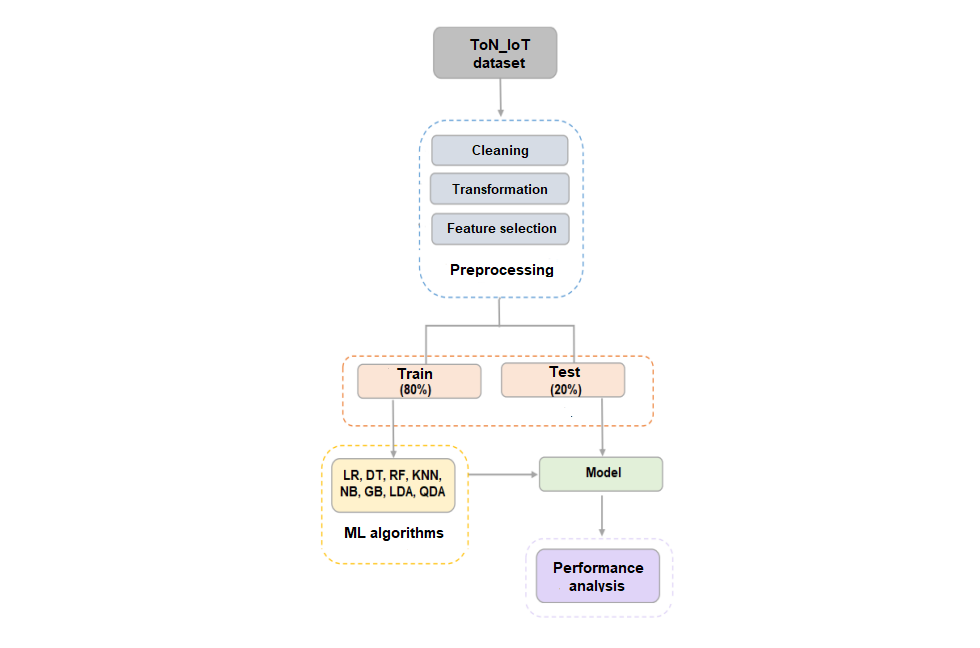

## Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix

In [2]:
fridge = pd.read_csv(r"D:\dataset\IoT_Fridge.csv")
garage_door = pd.read_csv(r"D:\dataset\IoT_Garage_Door.csv")
gps = pd.read_csv(r"D:\dataset\IoT_GPS_Tracker.csv")
modbus = pd.read_csv(r"D:\dataset\IoT_Modbus.csv")
motion_light = pd.read_csv(r"D:\dataset\IoT_Motion_Light.csv")
thermostat = pd.read_csv(r"D:\dataset\IoT_Thermostat.csv")
weather = pd.read_csv(r"D:\dataset\IoT_Weather.csv")

## Preliminary data exploration

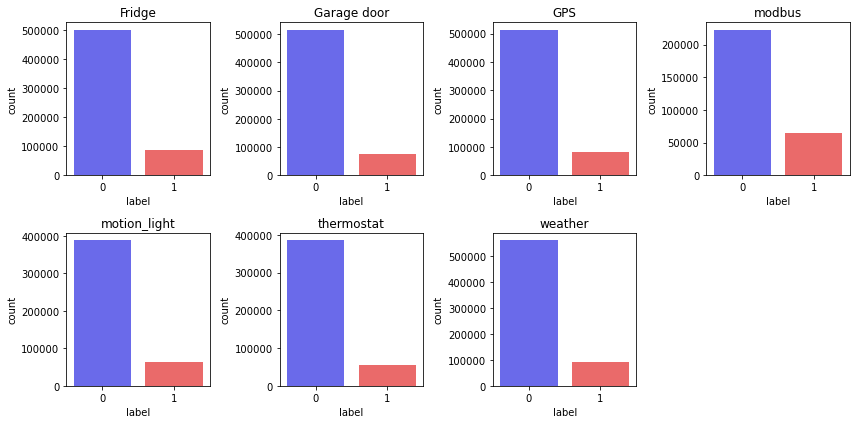

In [3]:
fig, axs = plt.subplots(2, 4, figsize=(12, 6))

a = sns.countplot(fridge['label'], palette = 'seismic', ax = axs[0,0])
b = sns.countplot(garage_door['label'], palette = 'seismic', ax = axs[0,1])
c = sns.countplot(gps['label'], palette = 'seismic', ax = axs[0,2])
d = sns.countplot(modbus['label'], palette = 'seismic', ax = axs[0,3])
e = sns.countplot(motion_light['label'], palette = 'seismic', ax = axs[1,0])
f = sns.countplot(thermostat['label'], palette = 'seismic', ax = axs[1,1])
g = sns.countplot(weather['label'], palette = 'seismic', ax = axs[1,2])

a.set_title('Fridge')
b.set_title('Garage door')
c.set_title('GPS')
d.set_title('modbus')
e.set_title('motion_light')
f.set_title('thermostat')
g.set_title('weather')

fig.delaxes(axs[1, 3])
plt.tight_layout()

# <center>IoT_Fridge<center>

In [4]:
fridge.head()

,date,time,fridge_temperature,temp_condition,label,type
0,31-Mar-19,12:36:52,13.10,high,0,normal
1,31-Mar-19,12:36:53,8.65,high,0,normal
2,31-Mar-19,12:36:54,2.00,low,0,normal
3,31-Mar-19,12:36:55,4.80,low,0,normal
4,31-Mar-19,12:36:56,10.70,high,0,normal


In [5]:
fridge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587076 entries, 0 to 587075
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                587076 non-null  object 
 1   time                587076 non-null  object 
 2   fridge_temperature  587076 non-null  float64
 3   temp_condition      587076 non-null  object 
 4   label               587076 non-null  int64  
 5   type                587076 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 26.9+ MB


In [25]:
type_counts = fridge['type'].value_counts()

fig = go.Figure(data=[go.Pie(labels=type_counts.index, values=type_counts)])
fig.update_traces(textinfo='percent+label', pull=[0.1, 0.1, 0.1, 0.1])
fig.update_layout(title='Fridge Type Distribution')

fig.show()

In [21]:
fridge['label'].value_counts()

0    500827
1     86249
Name: label, dtype: int64

### Preprocessing

In [22]:
fridge.value_counts('temp_condition')

# remove extra spaces !!!

temp_condition
high      193129
low       150183
high      114287
low        89420
high       22563
low        17494
dtype: int64

In [ ]:
fridge['temp_condition'] = fridge['temp_condition'].apply(lambda x:x.strip()) 

In [38]:
fridge['time'] = fridge['time'].apply(lambda x: x.strip())

In [39]:
# number of seconds that have passed since midnight

def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

fridge['time_seconds'] = fridge['time'].apply(time_to_seconds)

In [40]:
# target variable + features
X = fridge.drop(['date', 'time', 'label', 'type'], axis=1)
y = fridge['type']

In [41]:
# encoding categorical variables
label_encoder = LabelEncoder()
X['temp_condition'] = label_encoder.fit_transform(X['temp_condition'])

In [42]:
# training + testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train

,fridge_temperature,temp_condition,time_seconds
189639,7.65,2,15495
304660,1.00,5,35883
408687,4.95,3,74706
460624,11.25,0,45642
197265,5.05,5,15525
...,...,...,...
110268,6.95,2,15108
259178,5.85,5,76677
365838,8.55,2,10669
131932,7.10,2,15229


### Decision Tree Classifier

In [11]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.832671867547864


In [12]:
# Get classification report
classification_rep = classification_report(y_test, dt_predictions)

# Print classification report
print("Decision Tree Classification Report:")
print(classification_rep)

Decision Tree Classification Report:
              precision    recall  f1-score   support

    backdoor       0.24      0.24      0.24      7192
        ddos       0.14      0.13      0.13      2090
   injection       0.31      0.33      0.32      1415
      normal       0.93      0.93      0.93    100027
    password       0.34      0.34      0.34      5707
  ransomware       0.27      0.26      0.27       577
         xss       0.30      0.26      0.28       408

    accuracy                           0.83    117416
   macro avg       0.36      0.36      0.36    117416
weighted avg       0.83      0.83      0.83    117416



### Random Forest Classifier

In [13]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.836512911357907


In [14]:
classification_rep = classification_report(y_test, rf_predictions)

# Print classification report
print("Random Forest Classifier Report:")
print(classification_rep)

Random Forest Classifier Report:
              precision    recall  f1-score   support

    backdoor       0.25      0.24      0.25      7192
        ddos       0.14      0.12      0.13      2090
   injection       0.33      0.34      0.33      1415
      normal       0.93      0.94      0.93    100027
    password       0.34      0.34      0.34      5707
  ransomware       0.27      0.24      0.25       577
         xss       0.32      0.29      0.31       408

    accuracy                           0.84    117416
   macro avg       0.37      0.36      0.36    117416
weighted avg       0.83      0.84      0.83    117416



### Gradient Boosting Classifier

In [15]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)
gb_predictions = gb_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Accuracy:", gb_accuracy)

Gradient Boosting Accuracy: 0.8630169653198883


In [16]:
classification_rep = classification_report(y_test, gb_predictions)

# Print classification report
print("Gradient Boosting Classifier Report:")
print(classification_rep)

Gradient Boosting Classifier Report:
              precision    recall  f1-score   support

    backdoor       0.37      0.03      0.05      7192
        ddos       0.38      0.00      0.00      2090
   injection       0.46      0.10      0.16      1415
      normal       0.90      0.98      0.94    100027
    password       0.37      0.53      0.43      5707
  ransomware       0.00      0.00      0.00       577
         xss       0.29      0.02      0.05       408

    accuracy                           0.86    117416
   macro avg       0.40      0.24      0.23    117416
weighted avg       0.82      0.86      0.83    117416



### KNNs

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
k = 5  # Choose an appropriate value for K
knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn_classifier.fit(X_train_scaled, y_train)
y_pred = knn_classifier.predict(X_test_scaled)

KNeighborsClassifier(metric='euclidean')

In [14]:
knn_accuracy = accuracy_score(y_test, y_pred)
print("KNNs Accuracy:", knn_accuracy)

KNNs Accuracy: 0.8438543299039313


In [ ]:
classification_rep = classification_report(y_test, y_pred)
print("KNNs Classifier Report:")
print(classification_rep)

### Logistic Regression

In [16]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [18]:
y_pred = logistic_model.predict(X_test_scaled)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

    backdoor       0.26      0.05      0.09      7192
        ddos       0.00      0.00      0.00      2090
   injection       0.00      0.00      0.00      1415
      normal       0.86      0.99      0.92    100027
    password       0.00      0.00      0.00      5707
  ransomware       0.00      0.00      0.00       577
         xss       0.00      0.00      0.00       408

    accuracy                           0.85    117416
   macro avg       0.16      0.15      0.14    117416
weighted avg       0.75      0.85      0.79    117416



### Naive Bayes Classifier

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.8519026367786332


In [47]:
classification_rep = classification_report(y_test, nb_predictions)

# Print classification report
print("Naive Bayes Classifier Report:")
print(classification_rep)

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

    backdoor       0.00      0.00      0.00      7192
        ddos       0.00      0.00      0.00      2090
   injection       0.00      0.00      0.00      1415
      normal       0.85      1.00      0.92    100027
    password       0.00      0.00      0.00      5707
  ransomware       0.00      0.00      0.00       577
         xss       0.00      0.00      0.00       408

    accuracy                           0.85    117416
   macro avg       0.12      0.14      0.13    117416
weighted avg       0.73      0.85      0.78    117416



### Linear Discriminant Analysis (LDA)

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [51]:
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, y_train)
lda_predictions = lda_classifier.predict(X_test)
lda_accuracy = accuracy_score(y_test, lda_predictions)
print("Linear Discriminant Analysis Accuracy:", lda_accuracy)

Linear Discriminant Analysis Accuracy: 0.8494157525379846


In [52]:
classification_rep = classification_report(y_test, lda_predictions)

# Print classification report
print("Linear Discriminant Analysis Report:")
print(classification_rep)

Linear Discriminant Analysis Report:
              precision    recall  f1-score   support

    backdoor       0.26      0.07      0.11      7192
        ddos       0.00      0.00      0.00      2090
   injection       0.00      0.00      0.00      1415
      normal       0.86      0.99      0.92    100027
    password       0.00      0.00      0.00      5707
  ransomware       0.00      0.00      0.00       577
         xss       0.00      0.00      0.00       408

    accuracy                           0.85    117416
   macro avg       0.16      0.15      0.15    117416
weighted avg       0.75      0.85      0.79    117416



### Quadratic Discriminant Analysis (QDA)

In [54]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [55]:
qda_classifier = QuadraticDiscriminantAnalysis()
qda_classifier.fit(X_train, y_train)
qda_predictions = qda_classifier.predict(X_test)
qda_accuracy = accuracy_score(y_test, qda_predictions)
print("Quadratic Discriminant Analysis Accuracy:", qda_accuracy)

Quadratic Discriminant Analysis Accuracy: 0.8512298153573619


In [56]:
classification_rep = classification_report(y_test, qda_predictions)

# Print classification report
print("Quadratic Discriminant Analysis Report:")
print(classification_rep)

Quadratic Discriminant Analysis Report:
              precision    recall  f1-score   support

    backdoor       0.00      0.00      0.00      7192
        ddos       0.00      0.00      0.00      2090
   injection       0.26      0.02      0.05      1415
      normal       0.85      1.00      0.92    100027
    password       0.00      0.00      0.00      5707
  ransomware       0.32      0.04      0.07       577
         xss       0.29      0.08      0.13       408

    accuracy                           0.85    117416
   macro avg       0.25      0.16      0.17    117416
weighted avg       0.73      0.85      0.78    117416



### Results

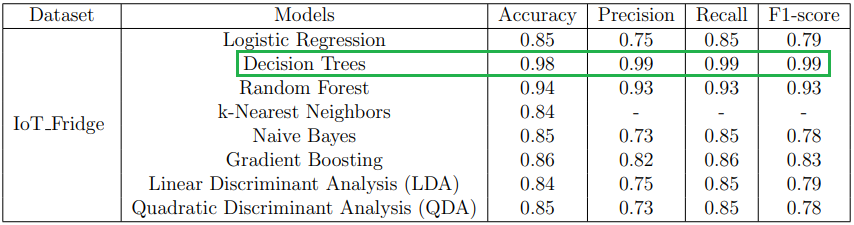

# <center>IoT_Garage_Door<center>

In [8]:
garage_door.head()

,date,time,door_state,sphone_signal,label,type
0,1-Apr-19,20:53:44,open,true,0,normal
1,1-Apr-19,20:53:49,closed,false,0,normal
2,1-Apr-19,20:53:49,open,true,0,normal
3,1-Apr-19,20:53:54,closed,false,0,normal
4,1-Apr-19,20:53:54,open,true,0,normal


In [9]:
garage_door.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591446 entries, 0 to 591445
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   date           570111 non-null  object
 1   time           570111 non-null  object
 2   door_state     541177 non-null  object
 3   sphone_signal  541177 non-null  object
 4   label          591446 non-null  int64 
 5   type           591446 non-null  object
dtypes: int64(1), object(5)
memory usage: 27.1+ MB


In [7]:
type_counts = garage_door['type'].value_counts()

fig = go.Figure(data=[go.Pie(labels=type_counts.index, values=type_counts)])
fig.update_traces(textinfo='percent+label', pull=[0.1, 0.1, 0.1, 0.1])
fig.update_layout(title='Garage Type Distribution')

fig.show()

In [23]:
garage_door['label'].value_counts()

0    515443
1     76003
Name: label, dtype: int64

### Preprocessing

In [57]:
print(garage_door['time'].unique())

['  20:53:44   ' '  20:53:49   ' '  20:53:54   ' ... ' 11:03:19 '
 ' 11:03:21 ' ' 11:03:24 ']


In [58]:
garage_door['time'] = garage_door['time'].fillna('')

In [59]:
garage_door['time'] = garage_door['time'].apply(lambda x: x.strip())

In [60]:
def time_to_seconds(time_str):
    if time_str:
        h, m, s = map(int, time_str.split(':'))
        return h * 3600 + m * 60 + s
    else:
        return 0

garage_door['time_seconds'] = garage_door['time'].apply(time_to_seconds)

In [130]:
garage_door.value_counts('sphone_signal') # aici iar ar fi de transformat.. de vazut ce e cu false true si alea

sphone_signal
false      318018
0.0        157485
true        35233
1.0         17425
0           11644
1            1372
dtype: int64

In [61]:
# target variable + features
X = garage_door.drop(['date', 'time', 'label', 'type'], axis=1)
y = garage_door['type']

In [66]:
type(garage_door.iloc[500000][3])

float

In [67]:
X['sphone_signal'] = X['sphone_signal'].apply(lambda x: str(x))

In [68]:
# encoding categorical variables
label_encoder = LabelEncoder()

X['door_state'] = label_encoder.fit_transform(X['door_state'])
X['sphone_signal'] = label_encoder.fit_transform(X['sphone_signal'])

In [69]:
# train + test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
X_train

,door_state,sphone_signal,time_seconds
5519,0,4,14747
347625,1,6,65384
342985,0,4,70499
13637,0,4,45737
102199,0,4,15087
...,...,...,...
110268,0,4,15013
259178,0,4,62517
365838,0,4,83946
131932,0,4,15150


### Decision Tree Classifier

In [71]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.8651365288697269


In [72]:
# Get classification report
classification_rep = classification_report(y_test, dt_predictions)

# Print classification report
print("Decision Tree Classification Report:")
print(classification_rep)

Decision Tree Classification Report:
              precision    recall  f1-score   support

    backdoor       0.36      0.37      0.36      7228
        ddos       0.31      0.36      0.34      2032
   injection       0.19      0.21      0.20      1199
      normal       0.94      0.94      0.94    103123
    password       0.42      0.38      0.40      3792
  ransomware       0.15      0.12      0.14       577
    scanning       0.00      0.00      0.00       114
         xss       0.44      0.48      0.46       225

    accuracy                           0.87    118290
   macro avg       0.35      0.36      0.35    118290
weighted avg       0.87      0.87      0.87    118290



### Random Forest Classifier

In [77]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8735818750528362


In [78]:
# Get classification report
classification_rep = classification_report(y_test, rf_predictions)

# Print classification report
print("Random Forest Classification Report:")
print(classification_rep)

Random Forest Classification Report:
              precision    recall  f1-score   support

    backdoor       0.44      0.34      0.38      7228
        ddos       0.31      0.31      0.31      2032
   injection       0.19      0.19      0.19      1199
      normal       0.94      0.95      0.94    103123
    password       0.44      0.51      0.47      3792
  ransomware       0.19      0.16      0.18       577
    scanning       0.00      0.00      0.00       114
         xss       0.44      0.56      0.49       225

    accuracy                           0.87    118290
   macro avg       0.37      0.38      0.37    118290
weighted avg       0.87      0.87      0.87    118290



### Gradient Boosting Classifier

In [79]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)
gb_predictions = gb_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Accuracy:", gb_accuracy)

Gradient Boosting Accuracy: 0.8926198326147603


In [80]:
# Get classification report
classification_rep = classification_report(y_test, gb_predictions)

# Print classification report
print("Random Forest Classification Report:")
print(classification_rep)

Random Forest Classification Report:
              precision    recall  f1-score   support

    backdoor       0.90      0.28      0.43      7228
        ddos       0.33      0.00      0.00      2032
   injection       0.41      0.07      0.11      1199
      normal       0.93      0.98      0.95    103123
    password       0.37      0.74      0.49      3792
  ransomware       0.00      0.00      0.00       577
    scanning       0.00      0.00      0.00       114
         xss       0.50      0.01      0.03       225

    accuracy                           0.89    118290
   macro avg       0.43      0.26      0.25    118290
weighted avg       0.89      0.89      0.87    118290



### KNNs

In [74]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
k = 5  # Choose an appropriate value for K
knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn_classifier.fit(X_train_scaled, y_train)
y_pred = knn_classifier.predict(X_test_scaled)

In [76]:
knn_accuracy = accuracy_score(y_test, y_pred)
print("KNNs Accuracy:", knn_accuracy)

KNNs Accuracy: 0.8611294276777411


In [77]:
classification_rep = classification_report(y_test, y_pred)
print("KNNs Classifier Report:")
print(classification_rep)

KNNs Classifier Report:
              precision    recall  f1-score   support

    backdoor       0.42      0.38      0.40      7228
        ddos       0.02      0.01      0.02      2032
   injection       0.21      0.24      0.22      1199
      normal       0.93      0.95      0.94    103123
    password       0.29      0.25      0.27      3792
  ransomware       0.20      0.12      0.15       577
    scanning       0.00      0.00      0.00       114
         xss       0.26      0.21      0.23       225

    accuracy                           0.86    118290
   macro avg       0.29      0.27      0.28    118290
weighted avg       0.85      0.86      0.86    118290



### Logistic Regression

In [78]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [79]:
y_pred = logistic_model.predict(X_test_scaled)

In [80]:
ll_accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", ll_accuracy)

Logistic Regression Accuracy: 0.872736495054527


In [81]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    backdoor       0.65      0.23      0.34      7228
        ddos       0.00      0.00      0.00      2032
   injection       0.00      0.00      0.00      1199
      normal       0.89      0.98      0.93    103123
    password       0.17      0.05      0.08      3792
  ransomware       0.00      0.00      0.00       577
    scanning       0.00      0.00      0.00       114
         xss       0.00      0.00      0.00       225

    accuracy                           0.87    118290
   macro avg       0.21      0.16      0.17    118290
weighted avg       0.82      0.87      0.84    118290



### Naive Bayes Classifier

In [81]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.8526164510947671


In [82]:
classification_rep = classification_report(y_test, nb_predictions)

# Print classification report
print("Naive Bayes Classifier Report:")
print(classification_rep)

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

    backdoor       0.22      0.10      0.14      7228
        ddos       0.00      0.00      0.00      2032
   injection       0.27      0.25      0.26      1199
      normal       0.92      0.95      0.94    103123
    password       0.26      0.57      0.35      3792
  ransomware       0.00      0.00      0.00       577
    scanning       0.00      0.00      0.00       114
         xss       0.00      0.00      0.00       225

    accuracy                           0.85    118290
   macro avg       0.21      0.23      0.21    118290
weighted avg       0.83      0.85      0.84    118290



### Linear Discriminant Analysis (LDA)

In [83]:
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, y_train)
lda_predictions = lda_classifier.predict(X_test)
lda_accuracy = accuracy_score(y_test, lda_predictions)
print("Linear Discriminant Analysis Accuracy:", lda_accuracy)

Linear Discriminant Analysis Accuracy: 0.8599205342801589


In [84]:
classification_rep = classification_report(y_test, lda_predictions)

# Print classification report
print("Linear Discriminant Analysis Report:")
print(classification_rep)

Linear Discriminant Analysis Report:
              precision    recall  f1-score   support

    backdoor       0.48      0.14      0.22      7228
        ddos       0.00      0.00      0.00      2032
   injection       0.00      0.00      0.00      1199
      normal       0.89      0.97      0.93    103123
    password       0.13      0.12      0.13      3792
  ransomware       0.00      0.00      0.00       577
    scanning       0.00      0.00      0.00       114
         xss       0.00      0.00      0.00       225

    accuracy                           0.86    118290
   macro avg       0.19      0.15      0.16    118290
weighted avg       0.81      0.86      0.83    118290



### Quadratic Discriminant Analysis (QDA)

In [85]:
qda_classifier = QuadraticDiscriminantAnalysis()
qda_classifier.fit(X_train, y_train)
qda_predictions = qda_classifier.predict(X_test)
qda_accuracy = accuracy_score(y_test, qda_predictions)
print("Quadratic Discriminant Analysis Accuracy:", qda_accuracy)

Quadratic Discriminant Analysis Accuracy: 0.010136106179727787


In [86]:
classification_rep = classification_report(y_test, qda_predictions)

# Print classification report
print("Quadratic Discriminant Analysis Report:")
print(classification_rep)

Quadratic Discriminant Analysis Report:
              precision    recall  f1-score   support

    backdoor       0.00      0.00      0.00      7228
        ddos       0.00      0.00      0.00      2032
   injection       0.01      1.00      0.02      1199
      normal       0.00      0.00      0.00    103123
    password       0.00      0.00      0.00      3792
  ransomware       0.00      0.00      0.00       577
    scanning       0.00      0.00      0.00       114
         xss       0.00      0.00      0.00       225

    accuracy                           0.01    118290
   macro avg       0.00      0.12      0.00    118290
weighted avg       0.00      0.01      0.00    118290



### Results

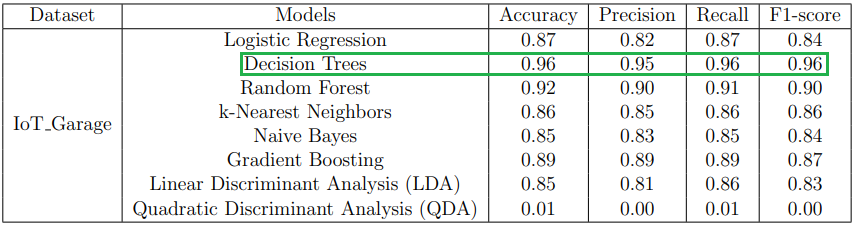

# <center>IoT_GPS_Tracker<center>

In [11]:
gps.head()

,date,time,latitude,longitude,label,type
0,31-Mar-19,12:36:52,0.0,10.0,0,normal
1,31-Mar-19,12:36:53,0.0,10.0,0,normal
2,31-Mar-19,12:36:54,0.0,10.0,0,normal
3,31-Mar-19,12:36:55,0.0,10.0,0,normal
4,31-Mar-19,12:36:56,0.0,10.0,0,normal


In [12]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595686 entries, 0 to 595685
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       595686 non-null  object 
 1   time       595686 non-null  object 
 2   latitude   595686 non-null  float64
 3   longitude  595686 non-null  float64
 4   label      595686 non-null  int64  
 5   type       595686 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 27.3+ MB


In [10]:
type_counts = gps['type'].value_counts()

fig = go.Figure(data=[go.Pie(labels=type_counts.index, values=type_counts)])
fig.update_traces(textinfo='percent+label', pull=[0.1, 0.1, 0.1, 0.1])
fig.update_layout(title='GPS Type Distribution')

fig.show()

In [24]:
gps['label'].value_counts()

0    513849
1     81837
Name: label, dtype: int64

### Preprocessing

In [88]:
gps['time'] = gps['time'].apply(lambda x: x.strip())

In [89]:
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

gps['time_seconds'] = gps['time'].apply(time_to_seconds)

In [90]:
# target variable + features
X = gps.drop(['date', 'time', 'label', 'type'], axis=1)
y = gps['type']

In [91]:
X

,latitude,longitude,time_seconds
0,0.000000,10.000000,45412
1,0.000000,10.000000,45413
2,0.000000,10.000000,45414
3,0.000000,10.000000,45415
4,0.000000,10.000000,45416
...,...,...,...
595681,182.523268,190.867134,45676
595682,183.122818,191.159551,45676
595683,247.820755,261.905963,45677
595684,246.000741,264.091992,45677


In [92]:
# train + test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree Classifier

In [30]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.9917742449932012


In [31]:
# Get classification report
classification_rep = classification_report(y_test, dt_predictions)

# Print classification report
print("Decision Tree Classification Report:")
print(classification_rep)

Decision Tree Classification Report:
              precision    recall  f1-score   support

    backdoor       0.97      0.97      0.97      7046
        ddos       0.95      0.93      0.94      2076
   injection       0.99      0.99      0.99      1396
      normal       0.99      1.00      1.00    102804
    password       0.99      0.99      0.99      5007
  ransomware       0.91      0.93      0.92       568
    scanning       0.98      0.94      0.96       127
         xss       1.00      1.00      1.00       114

    accuracy                           0.99    119138
   macro avg       0.97      0.97      0.97    119138
weighted avg       0.99      0.99      0.99    119138



### Random Forest Classifier

In [95]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9935620876630462


In [96]:
classification_rep = classification_report(y_test, rf_predictions)

# Print classification report
print("Random Forest Classifier Report:")
print(classification_rep)

Random Forest Classifier Report:
              precision    recall  f1-score   support

    backdoor       0.97      0.97      0.97      7046
        ddos       0.95      0.95      0.95      2076
   injection       0.99      1.00      1.00      1396
      normal       1.00      1.00      1.00    102804
    password       0.99      0.99      0.99      5007
  ransomware       0.95      0.93      0.94       568
    scanning       0.99      0.91      0.95       127
         xss       0.99      1.00      1.00       114

    accuracy                           0.99    119138
   macro avg       0.98      0.97      0.97    119138
weighted avg       0.99      0.99      0.99    119138



### Gradient Boosting Classifier

In [97]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)
gb_predictions = gb_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Accuracy:", gb_accuracy)

Gradient Boosting Accuracy: 0.9386090080410951


In [99]:
# Get classification report
classification_rep = classification_report(y_test, gb_predictions)

# Print classification report
print("Random Forest Classification Report:")
print(classification_rep)

Random Forest Classification Report:
              precision    recall  f1-score   support

    backdoor       0.99      0.75      0.85      7046
        ddos       0.93      0.07      0.13      2076
   injection       0.82      0.79      0.80      1396
      normal       0.94      0.99      0.97    102804
    password       0.88      0.49      0.63      5007
  ransomware       0.92      0.93      0.93       568
    scanning       0.89      0.19      0.31       127
         xss       1.00      0.99      1.00       114

    accuracy                           0.94    119138
   macro avg       0.92      0.65      0.70    119138
weighted avg       0.94      0.94      0.93    119138



### KNNs

In [100]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
k = 5  # Choose an appropriate value for K
knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn_classifier.fit(X_train_scaled, y_train)
y_pred = knn_classifier.predict(X_test_scaled)

In [102]:
knn_accuracy = accuracy_score(y_test, y_pred)
print("KNNs Accuracy:", knn_accuracy)

KNNs Accuracy: 0.9954338666084709


In [103]:
classification_rep = classification_report(y_test, y_pred)
print("KNNs Classifier Report:")
print(classification_rep)

KNNs Classifier Report:
              precision    recall  f1-score   support

    backdoor       0.97      0.99      0.98      7046
        ddos       0.95      0.98      0.96      2076
   injection       0.99      1.00      1.00      1396
      normal       1.00      1.00      1.00    102804
    password       0.99      0.99      0.99      5007
  ransomware       0.95      0.96      0.96       568
    scanning       0.98      0.97      0.98       127
         xss       0.99      1.00      1.00       114

    accuracy                           1.00    119138
   macro avg       0.98      0.99      0.98    119138
weighted avg       1.00      1.00      1.00    119138



### Logistic Regression

In [104]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [105]:
y_pred = logistic_model.predict(X_test_scaled)

In [106]:
ll_accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", ll_accuracy)

Logistic Regression Accuracy: 0.8628984874683141


In [107]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    backdoor       0.00      0.00      0.00      7046
        ddos       0.00      0.00      0.00      2076
   injection       0.00      0.00      0.00      1396
      normal       0.86      1.00      0.93    102804
    password       0.00      0.00      0.00      5007
  ransomware       0.00      0.00      0.00       568
    scanning       0.00      0.00      0.00       127
         xss       0.00      0.00      0.00       114

    accuracy                           0.86    119138
   macro avg       0.11      0.12      0.12    119138
weighted avg       0.74      0.86      0.80    119138



### Naive Bayes Classifier

In [108]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.5090063623696889


In [109]:
classification_rep = classification_report(y_test, nb_predictions)

# Print classification report
print("Naive Bayes Classifier Report:")
print(classification_rep)

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

    backdoor       0.00      0.00      0.00      7046
        ddos       0.00      0.00      0.00      2076
   injection       0.35      0.89      0.50      1396
      normal       0.82      0.57      0.67    102804
    password       0.02      0.01      0.01      5007
  ransomware       0.01      0.97      0.03       568
    scanning       0.03      0.67      0.05       127
         xss       0.46      0.73      0.57       114

    accuracy                           0.51    119138
   macro avg       0.21      0.48      0.23    119138
weighted avg       0.71      0.51      0.59    119138



### Linear Discriminant Analysis

In [110]:
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, y_train)
lda_predictions = lda_classifier.predict(X_test)
lda_accuracy = accuracy_score(y_test, lda_predictions)
print("Linear Discriminant Analysis Accuracy:", lda_accuracy)

Linear Discriminant Analysis Accuracy: 0.8628984874683141


In [111]:
classification_rep = classification_report(y_test, lda_predictions)

# Print classification report
print("Linear Discriminant Analysis Report:")
print(classification_rep)

Linear Discriminant Analysis Report:
              precision    recall  f1-score   support

    backdoor       0.00      0.00      0.00      7046
        ddos       0.00      0.00      0.00      2076
   injection       0.00      0.00      0.00      1396
      normal       0.86      1.00      0.93    102804
    password       0.00      0.00      0.00      5007
  ransomware       0.00      0.00      0.00       568
    scanning       0.00      0.00      0.00       127
         xss       0.00      0.00      0.00       114

    accuracy                           0.86    119138
   macro avg       0.11      0.12      0.12    119138
weighted avg       0.74      0.86      0.80    119138



conf matrix

### Quadratic Discriminant Analysis (QDA)

In [112]:
qda_classifier = QuadraticDiscriminantAnalysis()
qda_classifier.fit(X_train, y_train)
qda_predictions = qda_classifier.predict(X_test)
qda_accuracy = accuracy_score(y_test, qda_predictions)
print("Quadratic Discriminant Analysis Accuracy:", qda_accuracy)

Quadratic Discriminant Analysis Accuracy: 0.5598549581157984


In [113]:
classification_rep = classification_report(y_test, qda_predictions)

# Print classification report
print("Quadratic Discriminant Analysis Report:")
print(classification_rep)

Quadratic Discriminant Analysis Report:
              precision    recall  f1-score   support

    backdoor       0.41      0.08      0.13      7046
        ddos       0.92      0.03      0.07      2076
   injection       0.48      0.82      0.60      1396
      normal       0.83      0.62      0.71    102804
    password       0.00      0.00      0.00      5007
  ransomware       0.01      0.95      0.03       568
    scanning       0.57      1.00      0.73       127
         xss       0.69      1.00      0.82       114

    accuracy                           0.56    119138
   macro avg       0.49      0.56      0.39    119138
weighted avg       0.76      0.56      0.63    119138



### Results

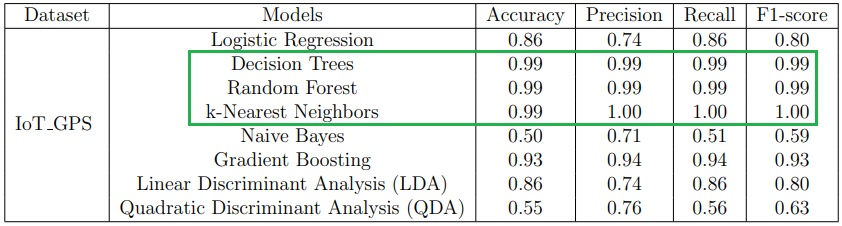

# <center>IoT_Modbus<center>

In [114]:
modbus.head()

,date,time,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label,type
0,31-Mar-19,12:36:55,53287,1463,33518,23014,0,normal
1,31-Mar-19,12:36:58,41029,55891,26004,50645,0,normal
2,31-Mar-19,12:36:58,41029,55891,26004,50645,0,normal
3,31-Mar-19,12:37:00,64661,40232,33460,44046,0,normal
4,31-Mar-19,12:37:01,64661,40232,33460,44046,0,normal


In [14]:
modbus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287194 entries, 0 to 287193
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   date                       287194 non-null  object
 1   time                       287194 non-null  object
 2   FC1_Read_Input_Register    287194 non-null  int64 
 3   FC2_Read_Discrete_Value    287194 non-null  int64 
 4   FC3_Read_Holding_Register  287194 non-null  int64 
 5   FC4_Read_Coil              287194 non-null  int64 
 6   label                      287194 non-null  int64 
 7   type                       287194 non-null  object
dtypes: int64(5), object(3)
memory usage: 17.5+ MB


In [13]:
type_counts = modbus['type'].value_counts()

fig = go.Figure(data=[go.Pie(labels=type_counts.index, values=type_counts)])
fig.update_traces(textinfo='percent+label', pull=[0.1, 0.1, 0.1, 0.1])
fig.update_layout(title='Modbus Type Distribution')

fig.show()

In [129]:
modbus['label'].value_counts()

0    222855
1     64339
Name: label, dtype: int64

### Preprocessing

In [117]:
modbus['time'] = modbus['time'].apply(lambda x: x.strip())

In [119]:
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

modbus['time_seconds'] = modbus['time'].apply(time_to_seconds)

In [120]:
modbus

,date,time,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label,type,time_seconds
0,31-Mar-19,12:36:55,53287,1463,33518,23014,0,normal,45415
1,31-Mar-19,12:36:58,41029,55891,26004,50645,0,normal,45418
2,31-Mar-19,12:36:58,41029,55891,26004,50645,0,normal,45418
3,31-Mar-19,12:37:00,64661,40232,33460,44046,0,normal,45420
4,31-Mar-19,12:37:01,64661,40232,33460,44046,0,normal,45421
...,...,...,...,...,...,...,...,...,...
287189,29-Apr-19,23:59:10,22798,40857,14335,58610,0,normal,86350
287190,29-Apr-19,23:59:22,15838,54368,63613,45660,0,normal,86362
287191,29-Apr-19,23:59:26,28674,60221,3792,17705,0,normal,86366
287192,29-Apr-19,23:59:32,28674,60221,3792,17705,0,normal,86372


In [121]:
# target + features
X = modbus.drop(['date', 'time', 'label', 'type'], axis=1)
y = modbus['type']

In [122]:
# training + testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree Classifier

In [125]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.9504169640836365


In [126]:
# Get classification report
classification_rep = classification_report(y_test, dt_predictions)

# Print classification report
print("Decision Tree Classification Report:")
print(classification_rep)

Decision Tree Classification Report:
              precision    recall  f1-score   support

    backdoor       0.88      0.95      0.91      8050
   injection       0.91      0.94      0.92       985
      normal       0.97      0.97      0.97     44581
    password       0.84      0.78      0.80      3611
    scanning       0.75      0.62      0.68       103
         xss       0.80      0.79      0.79       109

    accuracy                           0.95     57439
   macro avg       0.86      0.84      0.85     57439
weighted avg       0.95      0.95      0.95     57439



### Random Forest Classifier

In [127]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.967234805619875


In [128]:
classification_rep = classification_report(y_test, rf_predictions)

# Print classification report
print("Random Forest Classifier Report:")
print(classification_rep)

Random Forest Classifier Report:
              precision    recall  f1-score   support

    backdoor       0.96      0.95      0.95      8050
   injection       0.97      0.93      0.95       985
      normal       0.97      0.99      0.98     44581
    password       0.99      0.73      0.84      3611
    scanning       0.96      0.65      0.77       103
         xss       1.00      0.81      0.89       109

    accuracy                           0.97     57439
   macro avg       0.97      0.84      0.90     57439
weighted avg       0.97      0.97      0.97     57439



### Gradient Boosting Classifier

In [130]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)
gb_predictions = gb_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Accuracy:", gb_accuracy)

Gradient Boosting Accuracy: 0.7768415188286704


In [131]:
# Get classification report
classification_rep = classification_report(y_test, gb_predictions)

# Print classification report
print("Random Forest Classification Report:")
print(classification_rep)

Random Forest Classification Report:
              precision    recall  f1-score   support

    backdoor       0.62      0.01      0.01      8050
   injection       0.70      0.01      0.01       985
      normal       0.78      1.00      0.87     44581
    password       1.00      0.00      0.00      3611
    scanning       0.41      0.07      0.12       103
         xss       1.00      0.02      0.04       109

    accuracy                           0.78     57439
   macro avg       0.75      0.18      0.18     57439
weighted avg       0.77      0.78      0.68     57439



### KNNs

In [132]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [133]:
k = 5  # Choose an appropriate value for K
knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn_classifier.fit(X_train_scaled, y_train)
y_pred = knn_classifier.predict(X_test_scaled)

In [134]:
knn_accuracy = accuracy_score(y_test, y_pred)
print("KNNs Accuracy:", knn_accuracy)

KNNs Accuracy: 0.8063162659517052


In [135]:
classification_rep = classification_report(y_test, y_pred)
print("KNNs Classifier Report:")
print(classification_rep)

KNNs Classifier Report:
              precision    recall  f1-score   support

    backdoor       0.55      0.60      0.58      8050
   injection       0.46      0.32      0.38       985
      normal       0.87      0.90      0.89     44581
    password       0.45      0.22      0.29      3611
    scanning       0.24      0.06      0.09       103
         xss       0.24      0.04      0.06       109

    accuracy                           0.81     57439
   macro avg       0.47      0.36      0.38     57439
weighted avg       0.79      0.81      0.80     57439



### Logistic Regression

In [136]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [137]:
y_pred = logistic_model.predict(X_test_scaled)

In [138]:
ll_accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", ll_accuracy)

Logistic Regression Accuracy: 0.776145127874789


In [139]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    backdoor       0.00      0.00      0.00      8050
   injection       0.00      0.00      0.00       985
      normal       0.78      1.00      0.87     44581
    password       0.00      0.00      0.00      3611
    scanning       0.00      0.00      0.00       103
         xss       0.00      0.00      0.00       109

    accuracy                           0.78     57439
   macro avg       0.13      0.17      0.15     57439
weighted avg       0.60      0.78      0.68     57439



### Naive Bayes Classifier

In [140]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.776145127874789


In [141]:
classification_rep = classification_report(y_test, nb_predictions)

# Print classification report
print("Naive Bayes Classifier Report:")
print(classification_rep)

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

    backdoor       0.00      0.00      0.00      8050
   injection       0.00      0.00      0.00       985
      normal       0.78      1.00      0.87     44581
    password       0.00      0.00      0.00      3611
    scanning       0.00      0.00      0.00       103
         xss       0.00      0.00      0.00       109

    accuracy                           0.78     57439
   macro avg       0.13      0.17      0.15     57439
weighted avg       0.60      0.78      0.68     57439



### Linear Discriminant Analysis (LDA)

In [142]:
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, y_train)
lda_predictions = lda_classifier.predict(X_test)
lda_accuracy = accuracy_score(y_test, lda_predictions)
print("Linear Discriminant Analysis Accuracy:", lda_accuracy)

Linear Discriminant Analysis Accuracy: 0.776145127874789


In [143]:
classification_rep = classification_report(y_test, lda_predictions)

# Print classification report
print("Linear Discriminant Analysis Report:")
print(classification_rep)

Linear Discriminant Analysis Report:
              precision    recall  f1-score   support

    backdoor       0.00      0.00      0.00      8050
   injection       0.00      0.00      0.00       985
      normal       0.78      1.00      0.87     44581
    password       0.00      0.00      0.00      3611
    scanning       0.00      0.00      0.00       103
         xss       0.00      0.00      0.00       109

    accuracy                           0.78     57439
   macro avg       0.13      0.17      0.15     57439
weighted avg       0.60      0.78      0.68     57439



### Quadratic Discriminant Analysis (QDA)

In [144]:
qda_classifier = QuadraticDiscriminantAnalysis()
qda_classifier.fit(X_train, y_train)
qda_predictions = qda_classifier.predict(X_test)
qda_accuracy = accuracy_score(y_test, qda_predictions)
print("Quadratic Discriminant Analysis Accuracy:", qda_accuracy)

Quadratic Discriminant Analysis Accuracy: 0.776145127874789


In [147]:
classification_rep = classification_report(y_test, qda_predictions)

# Print classification report
print("Quadratic Discriminant Analysis Report:")
print(classification_rep)

Quadratic Discriminant Analysis Report:
              precision    recall  f1-score   support

    backdoor       0.00      0.00      0.00      8050
   injection       0.00      0.00      0.00       985
      normal       0.78      1.00      0.87     44581
    password       0.00      0.00      0.00      3611
    scanning       0.00      0.00      0.00       103
         xss       0.00      0.00      0.00       109

    accuracy                           0.78     57439
   macro avg       0.13      0.17      0.15     57439
weighted avg       0.60      0.78      0.68     57439



### Results

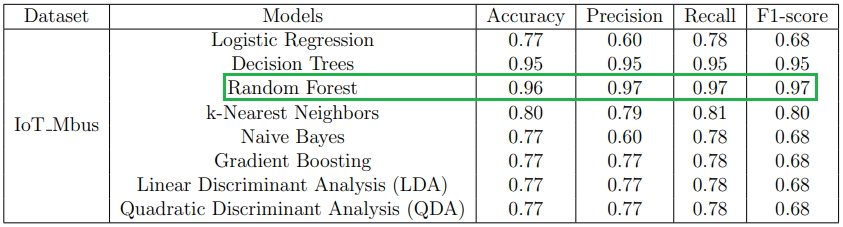

# <center>IoT_Motion_Light<center>

In [149]:
motion_light.head()

,date,time,motion_status,light_status,label,type
0,31-Mar-19,12:36:52,1,on,0,normal
1,31-Mar-19,12:36:53,0,off,0,normal
2,31-Mar-19,12:36:54,0,off,0,normal
3,31-Mar-19,12:36:55,1,on,0,normal
4,31-Mar-19,12:36:56,1,on,0,normal


In [16]:
motion_light.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452262 entries, 0 to 452261
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   date           452262 non-null  object
 1   time           452262 non-null  object
 2   motion_status  452262 non-null  int64 
 3   light_status   452262 non-null  object
 4   label          452262 non-null  int64 
 5   type           452262 non-null  object
dtypes: int64(2), object(4)
memory usage: 20.7+ MB


In [15]:
type_counts = motion_light['type'].value_counts()

fig = go.Figure(data=[go.Pie(labels=type_counts.index, values=type_counts)])
fig.update_traces(textinfo='percent+label', pull=[0.1, 0.1, 0.1, 0.1])
fig.update_layout(title='Motion Light Type Distribution')

fig.show()

In [150]:
motion_light['label'].value_counts()

0    388328
1     63934
Name: label, dtype: int64

### Preprocessing

In [151]:
motion_light['time'] = motion_light['time'].apply(lambda x: x.strip())

In [152]:
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

motion_light['time_seconds'] = motion_light['time'].apply(time_to_seconds)

In [153]:
# target + features
X = motion_light.drop(['date', 'time', 'label', 'type'], axis=1)
y = motion_light['type']

In [154]:
X

,motion_status,light_status,time_seconds
0,1,on,45412
1,0,off,45413
2,0,off,45414
3,1,on,45415
4,1,on,45416
...,...,...,...
452257,0,off,45674
452258,0,off,45678
452259,1,on,45679
452260,1,on,45679


In [155]:
# encoding categorical variables
label_encoder = LabelEncoder()
X['light_status'] = label_encoder.fit_transform(X['light_status'])

In [157]:
# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree Classifier

In [158]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.782572164549545


In [159]:
# Get classification report
classification_rep = classification_report(y_test, dt_predictions)

# Print classification report
print("Decision Tree Classification Report:")
print(classification_rep)

Decision Tree Classification Report:
              precision    recall  f1-score   support

    backdoor       0.12      0.14      0.13      5642
        ddos       0.05      0.05      0.05      1622
   injection       0.22      0.26      0.24      1105
      normal       0.88      0.89      0.89     77604
    password       0.17      0.10      0.12      3599
  ransomware       0.17      0.09      0.12       460
    scanning       0.03      0.01      0.02       344
         xss       0.04      0.03      0.03        77

    accuracy                           0.78     90453
   macro avg       0.21      0.20      0.20     90453
weighted avg       0.78      0.78      0.78     90453



### Random Forest Classifier

In [160]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8013332891114723


In [161]:
# Get classification report
classification_rep = classification_report(y_test, rf_predictions)

# Print classification report
print("Random Forest Classification Report:")
print(classification_rep)

Random Forest Classification Report:
              precision    recall  f1-score   support

    backdoor       0.12      0.08      0.10      5642
        ddos       0.04      0.03      0.03      1622
   injection       0.20      0.18      0.19      1105
      normal       0.88      0.92      0.90     77604
    password       0.16      0.11      0.13      3599
  ransomware       0.17      0.09      0.12       460
    scanning       0.02      0.02      0.02       344
         xss       0.03      0.03      0.03        77

    accuracy                           0.80     90453
   macro avg       0.20      0.18      0.19     90453
weighted avg       0.77      0.80      0.78     90453



### Gradient Boosting Classifier

In [162]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)
gb_predictions = gb_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Accuracy:", gb_accuracy)

Gradient Boosting Accuracy: 0.8577935502415619


In [163]:
# Get classification report
classification_rep = classification_report(y_test, gb_predictions)

# Print classification report
print("Gradient Boosting Classification Report:")
print(classification_rep)

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

    backdoor       0.17      0.00      0.00      5642
        ddos       0.00      0.00      0.00      1622
   injection       0.50      0.00      0.00      1105
      normal       0.86      1.00      0.92     77604
    password       0.25      0.00      0.00      3599
  ransomware       0.00      0.00      0.00       460
    scanning       0.00      0.00      0.00       344
         xss       0.00      0.00      0.00        77

    accuracy                           0.86     90453
   macro avg       0.22      0.13      0.12     90453
weighted avg       0.76      0.86      0.79     90453



### KNNs

In [164]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [165]:
k = 5  # Choose an appropriate value for K
knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn_classifier.fit(X_train_scaled, y_train)
y_pred = knn_classifier.predict(X_test_scaled)

In [166]:
knn_accuracy = accuracy_score(y_test, y_pred)
print("KNNs Accuracy:", knn_accuracy)

KNNs Accuracy: 0.8318353177893492


In [167]:
classification_rep = classification_report(y_test, y_pred)
print("KNNs Classifier Report:")
print(classification_rep)

KNNs Classifier Report:
              precision    recall  f1-score   support

    backdoor       0.06      0.02      0.03      5642
        ddos       0.00      0.00      0.00      1622
   injection       0.18      0.13      0.15      1105
      normal       0.86      0.97      0.91     77604
    password       0.08      0.01      0.02      3599
  ransomware       0.07      0.01      0.02       460
    scanning       0.00      0.00      0.00       344
         xss       0.00      0.00      0.00        77

    accuracy                           0.83     90453
   macro avg       0.16      0.14      0.14     90453
weighted avg       0.75      0.83      0.79     90453



### Logistic Regression

In [168]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [169]:
y_pred = logistic_model.predict(X_test_scaled)

In [170]:
ll_accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", ll_accuracy)

Logistic Regression Accuracy: 0.8579483267553315


In [171]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    backdoor       0.00      0.00      0.00      5642
        ddos       0.00      0.00      0.00      1622
   injection       0.00      0.00      0.00      1105
      normal       0.86      1.00      0.92     77604
    password       0.00      0.00      0.00      3599
  ransomware       0.00      0.00      0.00       460
    scanning       0.00      0.00      0.00       344
         xss       0.00      0.00      0.00        77

    accuracy                           0.86     90453
   macro avg       0.11      0.12      0.12     90453
weighted avg       0.74      0.86      0.79     90453



### Naive Bayes Classifier

In [172]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.8579483267553315


In [173]:
classification_rep = classification_report(y_test, nb_predictions)

# Print classification report
print("Naive Bayes Classifier Report:")
print(classification_rep)

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

    backdoor       0.00      0.00      0.00      5642
        ddos       0.00      0.00      0.00      1622
   injection       0.00      0.00      0.00      1105
      normal       0.86      1.00      0.92     77604
    password       0.00      0.00      0.00      3599
  ransomware       0.00      0.00      0.00       460
    scanning       0.00      0.00      0.00       344
         xss       0.00      0.00      0.00        77

    accuracy                           0.86     90453
   macro avg       0.11      0.12      0.12     90453
weighted avg       0.74      0.86      0.79     90453



### Linear Discriminant Analysis (LDA)

In [174]:
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, y_train)
lda_predictions = lda_classifier.predict(X_test)
lda_accuracy = accuracy_score(y_test, lda_predictions)
print("Linear Discriminant Analysis Accuracy:", lda_accuracy)

Linear Discriminant Analysis Accuracy: 0.8579483267553315


In [175]:
classification_rep = classification_report(y_test, lda_predictions)

# Print classification report
print("Linear Discriminant Analysis Report:")
print(classification_rep)

Linear Discriminant Analysis Report:
              precision    recall  f1-score   support

    backdoor       0.00      0.00      0.00      5642
        ddos       0.00      0.00      0.00      1622
   injection       0.00      0.00      0.00      1105
      normal       0.86      1.00      0.92     77604
    password       0.00      0.00      0.00      3599
  ransomware       0.00      0.00      0.00       460
    scanning       0.00      0.00      0.00       344
         xss       0.00      0.00      0.00        77

    accuracy                           0.86     90453
   macro avg       0.11      0.12      0.12     90453
weighted avg       0.74      0.86      0.79     90453



### Quadratic Discriminant Analysis (QDA)

In [177]:
qda_classifier = QuadraticDiscriminantAnalysis()
qda_classifier.fit(X_train, y_train)
qda_predictions = qda_classifier.predict(X_test)
qda_accuracy = accuracy_score(y_test, qda_predictions)
print("Quadratic Discriminant Analysis Accuracy:", qda_accuracy)

Quadratic Discriminant Analysis Accuracy: 0.005085514023857694


In [178]:
classification_rep = classification_report(y_test, qda_predictions)

# Print classification report
print("Quadratic Discriminant Analysis Report:")
print(classification_rep)

Quadratic Discriminant Analysis Report:
              precision    recall  f1-score   support

    backdoor       0.00      0.00      0.00      5642
        ddos       0.00      0.00      0.00      1622
   injection       0.00      0.00      0.00      1105
      normal       0.00      0.00      0.00     77604
    password       0.00      0.00      0.00      3599
  ransomware       0.01      1.00      0.01       460
    scanning       0.00      0.00      0.00       344
         xss       0.00      0.00      0.00        77

    accuracy                           0.01     90453
   macro avg       0.00      0.12      0.00     90453
weighted avg       0.00      0.01      0.00     90453



### Results

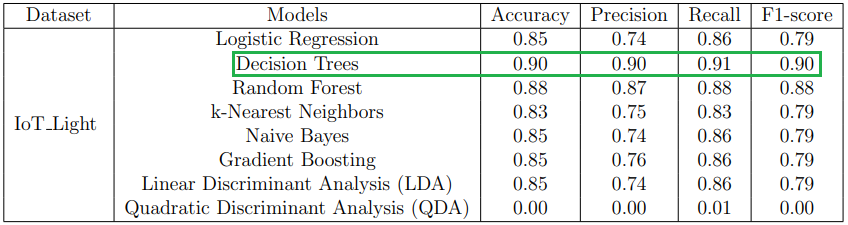

# <center>IoT_Thermostat<center>

In [80]:
thermostat.head()

,date,time,current_temperature,thermostat_status,label,type
0,31-Mar-19,12:36:52,25.0,0,0,normal
1,31-Mar-19,12:36:53,25.0,0,0,normal
2,31-Mar-19,12:36:54,25.0,0,0,normal
3,31-Mar-19,12:36:55,25.0,0,0,normal
4,31-Mar-19,12:36:56,25.0,0,0,normal


In [18]:
thermostat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442228 entries, 0 to 442227
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 437607 non-null  object 
 1   time                 437607 non-null  object 
 2   current_temperature  442228 non-null  float64
 3   thermostat_status    442228 non-null  int64  
 4   label                442228 non-null  int64  
 5   type                 442228 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 20.2+ MB


In [17]:
type_counts = thermostat['type'].value_counts()

fig = go.Figure(data=[go.Pie(labels=type_counts.index, values=type_counts)])
fig.update_traces(textinfo='percent+label', pull=[0.1, 0.1, 0.1, 0.1])
fig.update_layout(title='Thermostat Type Distribution')

fig.show()

In [78]:
thermostat['label'].value_counts()

0    385953
1     56275
Name: label, dtype: int64

### Preprocessing

In [106]:
def is_float(value):
    return isinstance(value, float)

thermostat = thermostat[~thermostat['time'].apply(lambda x: is_float(x))]

In [107]:
thermostat['time'] = thermostat['time'].apply(lambda x: x.strip())

In [108]:
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

thermostat['time_seconds'] = thermostat['time'].apply(time_to_seconds)

In [109]:
# target + features
X = thermostat.drop(['date', 'time', 'label', 'type'], axis=1)
y = thermostat['type']

In [110]:
# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree Classifier

In [86]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.834407349009392


In [87]:
# Get classification report
classification_rep = classification_report(y_test, dt_predictions)

# Print classification report
print("Decision Tree Classification Report:")
print(classification_rep)

Decision Tree Classification Report:
              precision    recall  f1-score   support

    backdoor       0.28      0.27      0.28      7089
   injection       0.40      0.40      0.40      1983
      normal       0.91      0.91      0.91     76190
    password       0.33      0.31      0.32      1684
  ransomware       0.27      0.25      0.26       484
    scanning       0.25      0.17      0.20        18
         xss       0.09      0.11      0.10        74

    accuracy                           0.83     87522
   macro avg       0.36      0.35      0.35     87522
weighted avg       0.83      0.83      0.83     87522



### Random Forest Classifier

In [88]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8572473206736592


In [89]:
# Get classification report
classification_rep = classification_report(y_test, rf_predictions)

# Print classification report
print("Random Forest Classification Report:")
print(classification_rep)

Random Forest Classification Report:
              precision    recall  f1-score   support

    backdoor       0.27      0.09      0.14      7089
   injection       0.40      0.35      0.37      1983
      normal       0.89      0.96      0.92     76190
    password       0.29      0.10      0.15      1684
  ransomware       0.30      0.10      0.15       484
    scanning       0.00      0.00      0.00        18
         xss       0.19      0.05      0.08        74

    accuracy                           0.86     87522
   macro avg       0.34      0.24      0.26     87522
weighted avg       0.81      0.86      0.83     87522



### Gradient Boosting Classifier

In [90]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)
gb_predictions = gb_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Accuracy:", gb_accuracy)

Gradient Boosting Accuracy: 0.8704668540481251


In [91]:
# Get classification report
classification_rep = classification_report(y_test, gb_predictions)

# Print classification report
print("Gradient Boosting Classification Report:")
print(classification_rep)

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

    backdoor       0.09      0.00      0.00      7089
   injection       0.44      0.10      0.17      1983
      normal       0.87      1.00      0.93     76190
    password       0.00      0.00      0.00      1684
  ransomware       0.00      0.00      0.00       484
    scanning       0.00      0.00      0.00        18
         xss       0.00      0.00      0.00        74

    accuracy                           0.87     87522
   macro avg       0.20      0.16      0.16     87522
weighted avg       0.78      0.87      0.81     87522



### KNNs

In [92]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
k = 5  # Choose an appropriate value for K
knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn_classifier.fit(X_train_scaled, y_train)
y_pred = knn_classifier.predict(X_test_scaled)

In [94]:
knn_accuracy = accuracy_score(y_test, y_pred)
print("KNNs Accuracy:", knn_accuracy)

KNNs Accuracy: 0.8468042320787916


In [95]:
classification_rep = classification_report(y_test, y_pred)
print("KNNs Classifier Report:")
print(classification_rep)

KNNs Classifier Report:
              precision    recall  f1-score   support

    backdoor       0.17      0.07      0.10      7089
   injection       0.34      0.34      0.34      1983
      normal       0.89      0.96      0.92     76190
    password       0.16      0.03      0.05      1684
  ransomware       0.27      0.06      0.10       484
    scanning       0.00      0.00      0.00        18
         xss       0.25      0.01      0.03        74

    accuracy                           0.85     87522
   macro avg       0.30      0.21      0.22     87522
weighted avg       0.80      0.85      0.82     87522



### Logistic Regression

In [96]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [97]:
y_pred = logistic_model.predict(X_test_scaled)

In [98]:
ll_accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", ll_accuracy)

Logistic Regression Accuracy: 0.8705239825415324


In [99]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    backdoor       0.00      0.00      0.00      7089
   injection       0.00      0.00      0.00      1983
      normal       0.87      1.00      0.93     76190
    password       0.00      0.00      0.00      1684
  ransomware       0.00      0.00      0.00       484
    scanning       0.00      0.00      0.00        18
         xss       0.00      0.00      0.00        74

    accuracy                           0.87     87522
   macro avg       0.12      0.14      0.13     87522
weighted avg       0.76      0.87      0.81     87522



### Naive Bayes Classifier

In [100]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.8705239825415324


In [101]:
classification_rep = classification_report(y_test, nb_predictions)

# Print classification report
print("Naive Bayes Classifier Report:")
print(classification_rep)

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

    backdoor       0.00      0.00      0.00      7089
   injection       0.00      0.00      0.00      1983
      normal       0.87      1.00      0.93     76190
    password       0.00      0.00      0.00      1684
  ransomware       0.00      0.00      0.00       484
    scanning       0.00      0.00      0.00        18
         xss       0.00      0.00      0.00        74

    accuracy                           0.87     87522
   macro avg       0.12      0.14      0.13     87522
weighted avg       0.76      0.87      0.81     87522



### Linear Discriminant Analysis

In [102]:
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, y_train)
lda_predictions = lda_classifier.predict(X_test)
lda_accuracy = accuracy_score(y_test, lda_predictions)
print("Linear Discriminant Analysis Accuracy:", lda_accuracy)

Linear Discriminant Analysis Accuracy: 0.8705239825415324


In [103]:
classification_rep = classification_report(y_test, lda_predictions)

# Print classification report
print("Linear Discriminant Analysis Report:")
print(classification_rep)

Linear Discriminant Analysis Report:
              precision    recall  f1-score   support

    backdoor       0.00      0.00      0.00      7089
   injection       0.00      0.00      0.00      1983
      normal       0.87      1.00      0.93     76190
    password       0.00      0.00      0.00      1684
  ransomware       0.00      0.00      0.00       484
    scanning       0.00      0.00      0.00        18
         xss       0.00      0.00      0.00        74

    accuracy                           0.87     87522
   macro avg       0.12      0.14      0.13     87522
weighted avg       0.76      0.87      0.81     87522



### Quadratic Discriminant Analysis

In [111]:
qda_classifier = QuadraticDiscriminantAnalysis()
qda_classifier.fit(X_train, y_train)
qda_predictions = qda_classifier.predict(X_test)
qda_accuracy = accuracy_score(y_test, qda_predictions)
print("Quadratic Discriminant Analysis Accuracy:", qda_accuracy)

Quadratic Discriminant Analysis Accuracy: 0.8705239825415324


In [112]:
classification_rep = classification_report(y_test, qda_predictions)

# Print classification report
print("Quadratic Discriminant Analysis Report:")
print(classification_rep)

Quadratic Discriminant Analysis Report:
              precision    recall  f1-score   support

    backdoor       0.00      0.00      0.00      7089
   injection       0.00      0.00      0.00      1983
      normal       0.87      1.00      0.93     76190
    password       0.00      0.00      0.00      1684
  ransomware       0.00      0.00      0.00       484
    scanning       0.00      0.00      0.00        18
         xss       0.00      0.00      0.00        74

    accuracy                           0.87     87522
   macro avg       0.12      0.14      0.13     87522
weighted avg       0.76      0.87      0.81     87522



### Results

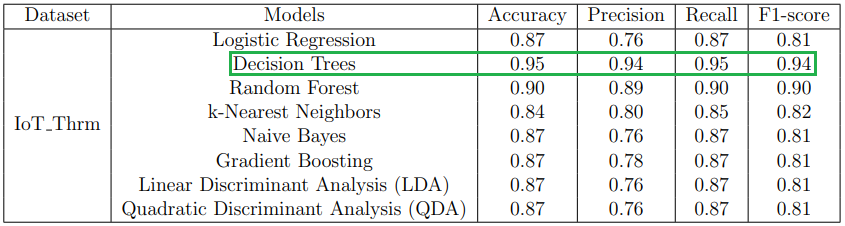

# <center>IoT_Weather<center>

In [113]:
weather.head()

,date,time,temperature,pressure,humidity,label,type
0,31-Mar-19,12:36:52,31.788508,1.035,32.036579,0,normal
1,31-Mar-19,12:36:53,41.630997,1.035,30.886165,0,normal
2,31-Mar-19,12:36:54,42.256959,1.035,19.755908,0,normal
3,31-Mar-19,12:36:55,49.116581,1.035,78.949621,0,normal
4,31-Mar-19,12:36:56,24.017085,1.035,40.001059,0,normal


In [20]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650242 entries, 0 to 650241
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         650242 non-null  object 
 1   time         650242 non-null  object 
 2   temperature  650242 non-null  float64
 3   pressure     650242 non-null  float64
 4   humidity     650242 non-null  float64
 5   label        650242 non-null  int64  
 6   type         650242 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 34.7+ MB


In [19]:
type_counts = weather['type'].value_counts()

fig = go.Figure(data=[go.Pie(labels=type_counts.index, values=type_counts)])
fig.update_traces(textinfo='percent+label', pull=[0.1, 0.1, 0.1, 0.1])
fig.update_layout(title='Weather Type Distribution')

fig.show()

In [114]:
weather['label'].value_counts()

0    559718
1     90524
Name: label, dtype: int64

### Preprocessing

In [115]:
weather['time'] = weather['time'].apply(lambda x: x.strip())

In [116]:
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

weather['time_seconds'] = weather['time'].apply(time_to_seconds)

In [117]:
# target variable + features
X = weather.drop(['date', 'time', 'label', 'type'], axis=1)
y = weather['type']

In [118]:
# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree Classifier

In [119]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.9911802474451937


In [120]:
# Get classification report
classification_rep = classification_report(y_test, dt_predictions)

# Print classification report
print("Decision Tree Classification Report:")
print(classification_rep)

Decision Tree Classification Report:
              precision    recall  f1-score   support

    backdoor       0.97      0.96      0.96      7068
        ddos       0.95      0.95      0.95      3054
   injection       0.99      0.99      0.99      1913
      normal       0.99      1.00      1.00    111932
    password       0.99      0.98      0.98      5186
  ransomware       0.94      0.93      0.93       596
    scanning       0.94      0.98      0.96       105
         xss       0.99      0.96      0.98       195

    accuracy                           0.99    130049
   macro avg       0.97      0.97      0.97    130049
weighted avg       0.99      0.99      0.99    130049



### Random Forest Classifier

In [121]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9944943828864505


In [122]:
# Get classification report
classification_rep = classification_report(y_test, rf_predictions)

# Print classification report
print("Random Forest Classification Report:")
print(classification_rep)

Random Forest Classification Report:
              precision    recall  f1-score   support

    backdoor       0.97      0.98      0.98      7068
        ddos       0.95      0.97      0.96      3054
   injection       0.99      1.00      1.00      1913
      normal       1.00      1.00      1.00    111932
    password       0.99      0.99      0.99      5186
  ransomware       0.96      0.94      0.95       596
    scanning       0.98      0.95      0.97       105
         xss       1.00      1.00      1.00       195

    accuracy                           0.99    130049
   macro avg       0.98      0.98      0.98    130049
weighted avg       0.99      0.99      0.99    130049



### Gradient Boosting Classifier

In [123]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)
gb_predictions = gb_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Accuracy:", gb_accuracy)

Gradient Boosting Accuracy: 0.8996224499996155


In [124]:
# Get classification report
classification_rep = classification_report(y_test, gb_predictions)

# Print classification report
print("Gradient Boosting Classification Report:")
print(classification_rep)

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

    backdoor       0.90      0.25      0.39      7068
        ddos       0.85      0.35      0.50      3054
   injection       0.79      0.75      0.77      1913
      normal       0.90      0.99      0.95    111932
    password       0.84      0.16      0.26      5186
  ransomware       0.90      0.75      0.82       596
    scanning       0.57      0.52      0.54       105
         xss       1.00      0.93      0.96       195

    accuracy                           0.90    130049
   macro avg       0.84      0.59      0.65    130049
weighted avg       0.90      0.90      0.87    130049



### KNNs

In [125]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [126]:
k = 5  # Choose an appropriate value for K
knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn_classifier.fit(X_train_scaled, y_train)
y_pred = knn_classifier.predict(X_test_scaled)

In [127]:
knn_accuracy = accuracy_score(y_test, y_pred)
print("KNNs Accuracy:", knn_accuracy)

KNNs Accuracy: 0.9897500173011711


In [128]:
classification_rep = classification_report(y_test, y_pred)
print("KNNs Classifier Report:")
print(classification_rep)

KNNs Classifier Report:
              precision    recall  f1-score   support

    backdoor       0.96      0.98      0.97      7068
        ddos       0.93      0.96      0.95      3054
   injection       0.98      0.98      0.98      1913
      normal       0.99      0.99      0.99    111932
    password       0.98      0.95      0.96      5186
  ransomware       0.91      0.81      0.85       596
    scanning       0.90      0.90      0.90       105
         xss       1.00      0.95      0.97       195

    accuracy                           0.99    130049
   macro avg       0.96      0.94      0.95    130049
weighted avg       0.99      0.99      0.99    130049



### Logistic Regression

In [129]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [130]:
y_pred = logistic_model.predict(X_test_scaled)

In [131]:
ll_accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", ll_accuracy)

Logistic Regression Accuracy: 0.8606755915078163


In [132]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    backdoor       0.00      0.00      0.00      7068
        ddos       0.00      0.00      0.00      3054
   injection       0.00      0.00      0.00      1913
      normal       0.86      1.00      0.93    111932
    password       0.00      0.00      0.00      5186
  ransomware       0.00      0.00      0.00       596
    scanning       0.33      0.02      0.04       105
         xss       0.00      0.00      0.00       195

    accuracy                           0.86    130049
   macro avg       0.15      0.13      0.12    130049
weighted avg       0.74      0.86      0.80    130049



### Naive Bayes Classifier

In [133]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.8560542564725604


In [134]:
classification_rep = classification_report(y_test, nb_predictions)

# Print classification report
print("Naive Bayes Classifier Report:")
print(classification_rep)

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

    backdoor       0.00      0.00      0.00      7068
        ddos       0.00      0.00      0.00      3054
   injection       0.00      0.00      0.00      1913
      normal       0.86      0.99      0.92    111932
    password       0.00      0.00      0.00      5186
  ransomware       0.20      0.36      0.26       596
    scanning       0.56      0.63      0.59       105
         xss       1.00      0.09      0.16       195

    accuracy                           0.86    130049
   macro avg       0.33      0.26      0.24    130049
weighted avg       0.74      0.86      0.80    130049



### Linear Discriminant Analysis

In [135]:
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, y_train)
lda_predictions = lda_classifier.predict(X_test)
lda_accuracy = accuracy_score(y_test, lda_predictions)
print("Linear Discriminant Analysis Accuracy:", lda_accuracy)

Linear Discriminant Analysis Accuracy: 0.8606909703265693


In [136]:
classification_rep = classification_report(y_test, lda_predictions)

# Print classification report
print("Linear Discriminant Analysis Report:")
print(classification_rep)

Linear Discriminant Analysis Report:
              precision    recall  f1-score   support

    backdoor       0.00      0.00      0.00      7068
        ddos       0.00      0.00      0.00      3054
   injection       0.00      0.00      0.00      1913
      normal       0.86      1.00      0.93    111932
    password       0.00      0.00      0.00      5186
  ransomware       0.00      0.00      0.00       596
    scanning       0.00      0.00      0.00       105
         xss       0.00      0.00      0.00       195

    accuracy                           0.86    130049
   macro avg       0.11      0.12      0.12    130049
weighted avg       0.74      0.86      0.80    130049



### Quadratic Discriminant Analysis

In [137]:
qda_classifier = QuadraticDiscriminantAnalysis()
qda_classifier.fit(X_train, y_train)
qda_predictions = qda_classifier.predict(X_test)
qda_accuracy = accuracy_score(y_test, qda_predictions)
print("Quadratic Discriminant Analysis Accuracy:", qda_accuracy)

Quadratic Discriminant Analysis Accuracy: 0.8487339387461649


In [138]:
classification_rep = classification_report(y_test, qda_predictions)

# Print classification report
print("Quadratic Discriminant Analysis Report:")
print(classification_rep)

Quadratic Discriminant Analysis Report:
              precision    recall  f1-score   support

    backdoor       0.00      0.00      0.00      7068
        ddos       1.00      0.00      0.00      3054
   injection       0.00      0.00      0.00      1913
      normal       0.86      0.98      0.92    111932
    password       0.00      0.00      0.00      5186
  ransomware       0.13      0.47      0.20       596
    scanning       0.59      0.70      0.64       105
         xss       1.00      0.30      0.46       195

    accuracy                           0.85    130049
   macro avg       0.45      0.31      0.28    130049
weighted avg       0.77      0.85      0.79    130049



### Results

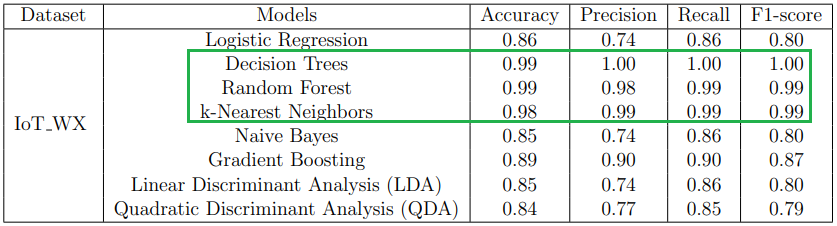